You are given an array representing a row of seats where seats[i] = 1 represents a person sitting in the ith seat, and seats[i] = 0 represents that the ith seat is empty (0-indexed).

There is at least one empty seat, and at least one person sitting.

Alex wants to sit in the seat such that the distance between him and the closest person to him is maximized. 

Return that maximum distance to the closest person.

## Example 1:

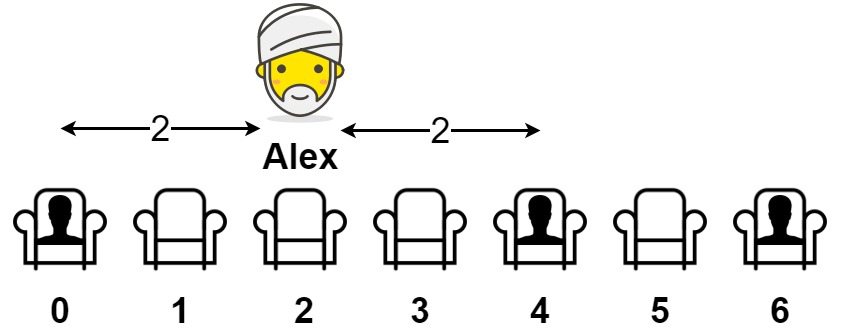

__Input__: seats = [1,0,0,0,1,0,1]  
__Output__: 2  
__Explanation__:   
If Alex sits in the second open seat (i.e. seats[2]), then the closest person has distance 2.  
If Alex sits in any other open seat, the closest person has distance 1.  
Thus, the maximum distance to the closest person is 2.


## Example 2:

__Input__: seats = [1,0,0,0]  
__Output__: 3  
__Explanation__:   
If Alex sits in the last seat (i.e. seats[3]), the closest person is 3 seats away.  
This is the maximum distance possible, so the answer is 3.


## Example 3:

__Input__: seats = [0,1]  
__Output__: 1

In [1]:
def maxDistToClosest(seats):
    N = len(seats)
    left, right = [N] * N, [N] * N

    for i in xrange(N):
        if seats[i] == 1: left[i] = 0
        elif i > 0: left[i] = left[i-1] + 1

    for i in xrange(N-1, -1, -1):
        if seats[i] == 1: right[i] = 0
        elif i < N-1: right[i] = right[i+1] + 1

    return max(min(left[i], right[i])
               for i, seat in enumerate(seats) if not seat)

In [5]:
def maxDistToClosest(seats):
    people = (i for i, seat in enumerate(seats) if seat)
    prev, future = None, next(people)

    ans = 0
    for i, seat in enumerate(seats):
        if seat:
            prev = i
        else:
            while future is not None and future < i:
                future = next(people, None)

            left = float('inf') if prev is None else i - prev
            right = float('inf') if future is None else future - i
            ans = max(ans, min(left, right))

    return ans

In [4]:
def maxDistToClosest(seats):
    ans = seats.index(1)
    seats.reverse()
    ans = max(ans,seats.index(1))
    for seat, group in itertools.groupby(seats):
        if not seat:
            K = len(list(group))
            ans = max(ans, (K+1)/2)

    return ans